In [1]:
# Librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Opciones para evitar notación científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: f"{x:0.5f}")

# Configuración de los gráficos
plt.style.use("ggplot")
%config InlineBackend.figure_format = "retina"


**Modelos no supervizados**

El set de datos datos clustering.csv contiene 1000 observaciones simuladas, en la que se poseen 10 atributos numéricos llamadas V1 a V10, además, del atributo y que indica el grupo real de la observación.

**Pregunta 1**
Realice un análisis de componentes principales seleccione la cantidad de componentes que expliquen al menos el 70% de la variabilidad de los datos.

In [2]:
#procedemos a cargar lo datos, ver sus caracteristicas y datos faltantes
datos =  pd.read_csv('datos clustering.csv')

datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   V1          1000 non-null   float64
 2   V2          1000 non-null   float64
 3   V3          1000 non-null   float64
 4   V4          1000 non-null   float64
 5   V5          1000 non-null   float64
 6   V6          1000 non-null   float64
 7   V7          1000 non-null   float64
 8   V8          1000 non-null   float64
 9   V9          1000 non-null   float64
 10  V10         1000 non-null   float64
 11  y           1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [3]:
datos.describe()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,y
count,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000
mean,499.50000,1.71024,2.92348,1.07110,1.43899,-4.83002,0.56269,-4.33760,3.76800,4.05971,0.88511,2.00000
std,288.81944,5.61357,3.33214,2.55393,6.07832,5.15261,4.77501,4.62989,6.24462,5.27156,4.44601,1.41492
min,0.00000,-10.33605,-6.16355,-5.57837,-13.91028,-14.58728,-12.40671,-13.67022,-12.36367,-8.23112,-8.15797,0.00000
25%,249.75000,-3.24124,0.15653,-0.70325,-0.80085,-8.96104,-0.14729,-8.03157,1.33621,-0.52249,-2.66610,1.00000
50%,499.50000,1.14213,3.35059,1.03711,2.13673,-6.79444,2.19292,-5.27573,6.12850,5.23732,-0.47172,2.00000
75%,749.25000,6.64916,5.57788,2.74920,6.12188,-0.56868,3.68581,-0.38847,8.34406,8.46240,4.70098,3.00000
max,999.00000,14.37355,11.24862,8.54540,12.25445,8.06876,7.75833,7.56343,14.25734,14.65629,11.99825,4.00000


In [4]:
#como podemos ver los datos son de caracter numerico y no tienen componentes faltnatas

#ahora procedemos a ver el balanceo de los datos

datos['y'].value_counts()

3    200
2    200
1    200
0    200
4    200
Name: y, dtype: int64

In [5]:
#los datos estan balanceados, lo que es algo bueno y no hay que tener diferentes consideraciones para trabajarlos

#procedmeos a realizar el PCA con las variables indicadas

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()

pipeline_pca = make_pipeline(
                scaler,
                pca
                )

#procedemos a eliminar la variable target y Unnamed:0 dentro de los datos
x = datos.drop(columns=['y', 'Unnamed: 0'], axis=1)

#Ajustamos el pipeline con los datos
pipeline_pca.fit(x)

#procedemos a obter la varianza explicada de cada dato
varianza_explicada = pipeline_pca.named_steps['pca'].explained_variance_ratio_

#Calculamos la varianza acumulada
varianza_acumulada_explicada = varianza_explicada.cumsum()

#Vemos el numero de componente que efectivamente necesitamos para obter el 70% de variabilidad de los datos.
numero_de_componentes = (varianza_acumulada_explicada >= 0.7).argmax() + 1 



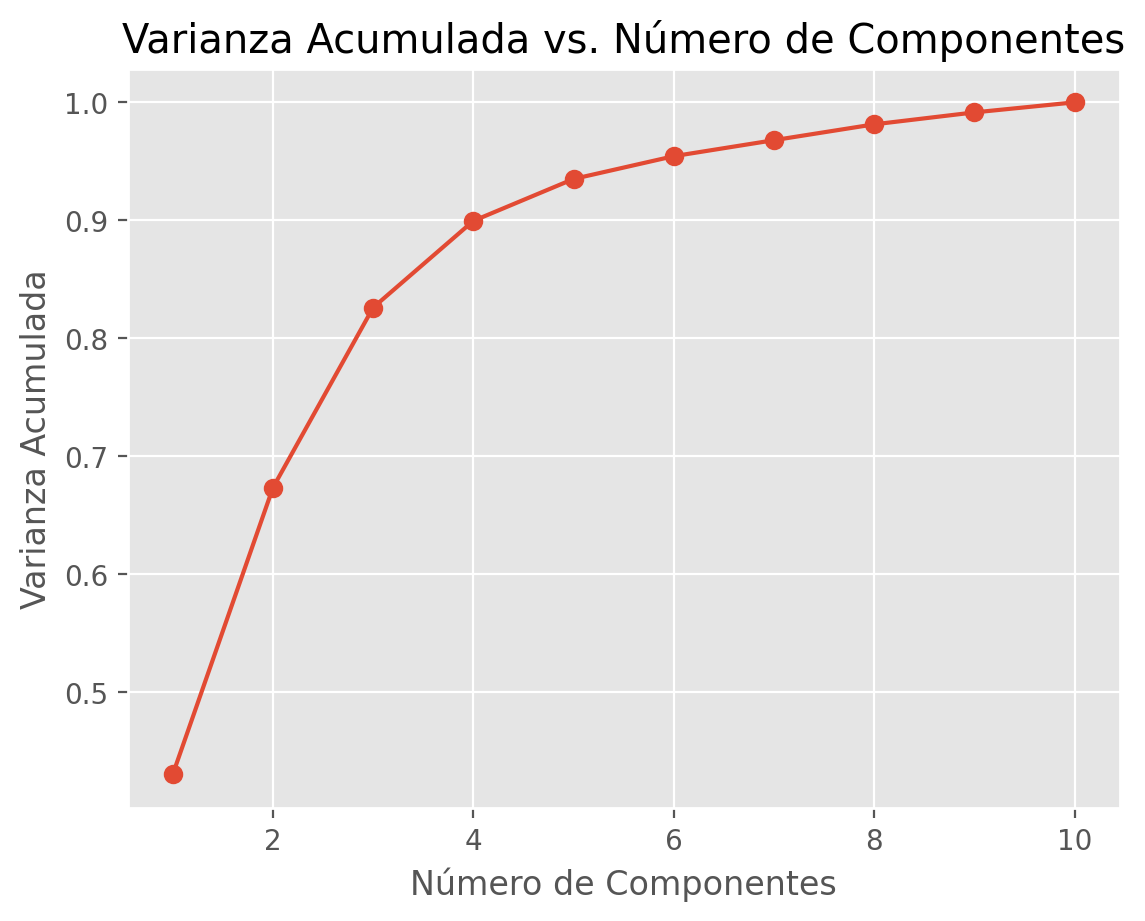

In [6]:
# Crearmos un gráfico de la varianza acumulada para ver el numero de componentes que necesitamos para tener la varianza como minimo del 70%
plt.plot(range(1, len(varianza_acumulada_explicada) + 1), varianza_acumulada_explicada, marker='o', linestyle='-')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada vs. Número de Componentes')
plt.grid(True)
plt.show()

Segun el grafico, podemos ver que le numero de omponenetes para llegar a 0,7 o as de kas dots corresponde a 3

In [7]:
#con esta informaicion podemos realizar el nuevo pipline dejando el n componentes en 3
pipeline_pca_conponentes = make_pipeline(
                StandardScaler(),
                PCA(n_components=3, random_state=2023)
                )

pipeline_pca_conponentes.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=3, random_state=2023))])

In [8]:
#procedemos a guardar los componentes del PCA

componentes = pipeline_pca_conponentes['pca'].components_

In [9]:
#procedemos a a tomar las proyecciones del algoritmo PCA con n_components=3
proyecciones = pipeline_pca_conponentes.transform(x)


In [10]:
proyecciones.shape

(1000, 3)

In [11]:
proyecciones

array([[-0.42893605,  1.89455793, -1.14054392],
       [-0.7630211 , -0.87643429,  2.04091993],
       [-1.2888175 , -0.52231763,  2.22910256],
       ...,
       [-1.06348453, -0.68033985,  1.28608079],
       [ 3.45890836, -1.60656834, -0.0805768 ],
       [-2.00141985, -2.57247539, -1.04503611]])

In [12]:
#procedemos a ver si los datos estan estandarizados para poder pasarcelos al modelo
column_names = ['columan 1', 'columna 2', 'columna 3']

df = pd.DataFrame(proyecciones, columns=column_names)

df.describe()

,columan 1,columna 2,columna 3
count,1000.00000,1000.00000,1000.00000
mean,-0.00000,-0.00000,0.00000
std,2.07428,1.56055,1.23671
min,-3.03970,-3.35313,-2.24731
25%,-1.47379,-1.18901,-1.02504
50%,-0.62227,-0.07243,-0.15722
75%,0.44986,1.38149,0.65904
max,4.67643,3.36824,3.16206


**Pregunta 2**
Detecte el número optimo de clustering utilizando la información de PCA con la metodología de Elbow y Average silhouette.

/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.

<bound method Visualizer.show of KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(n_clusters=29, random_state=2023), k=(2, 30))>

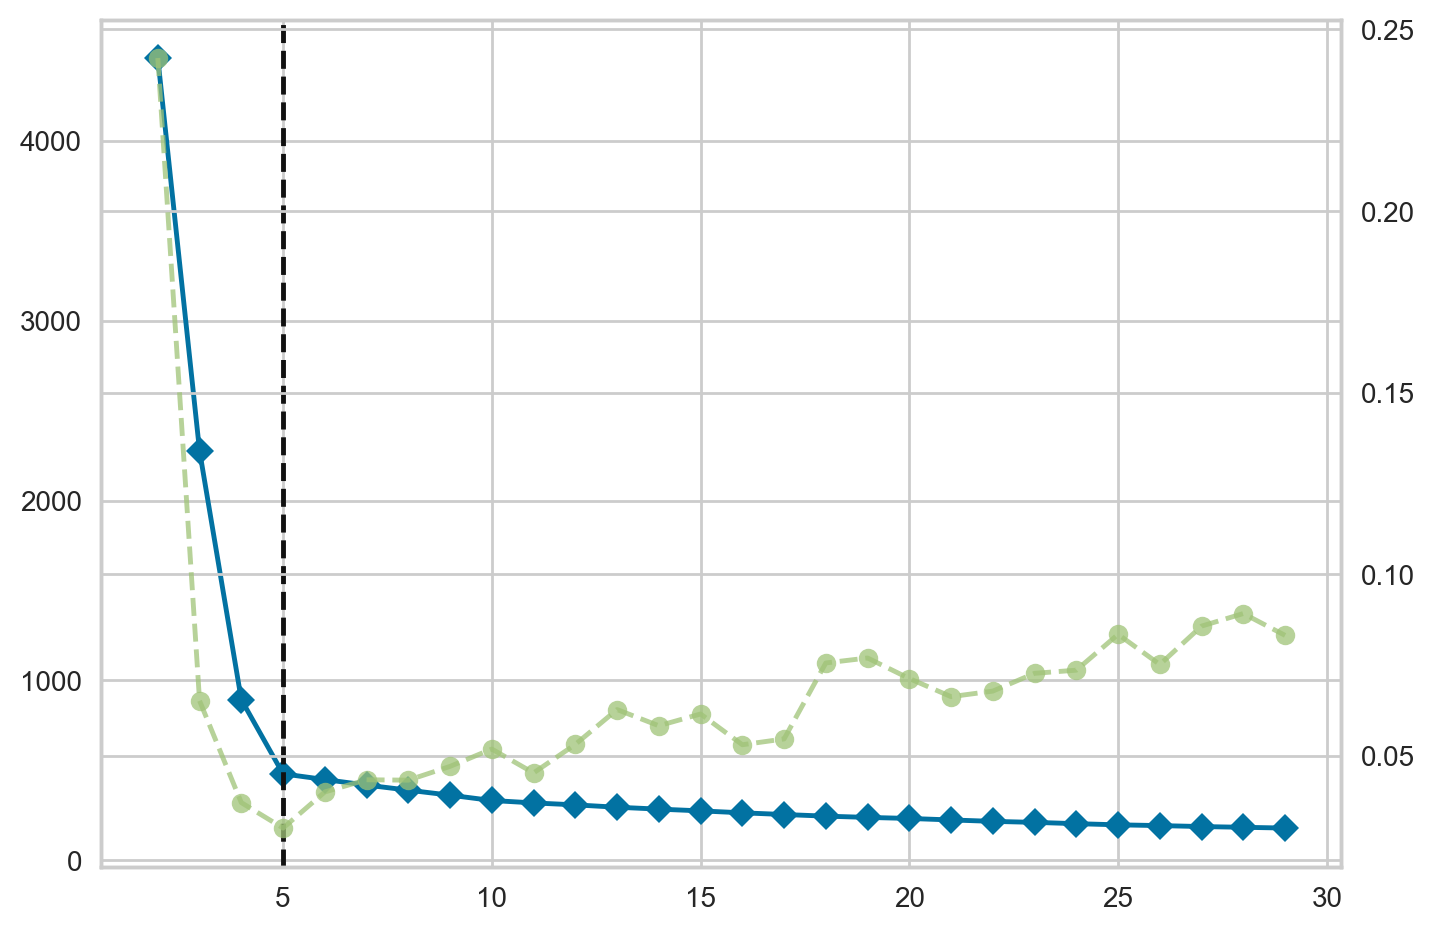

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# con los valores ya estandarizados, procedemos a usar la metodologia del codo para ver cual es el mejor numero de cluster posible
modelo = KMeans(random_state=2023)
visualizar_elbow = KElbowVisualizer(modelo,k = (2,30),
                            )

visualizar_elbow.fit(proyecciones)
visualizar_elbow.show



Como se puede ver en el grafico, donde se tiene la mayor ganancia posible, corresponde a un numero de cluster de 5, con el metodo Elbow

/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.

<bound method Visualizer.show of KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(n_clusters=29, random_state=2023), k=(2, 30),
                 metric='silhouette')>

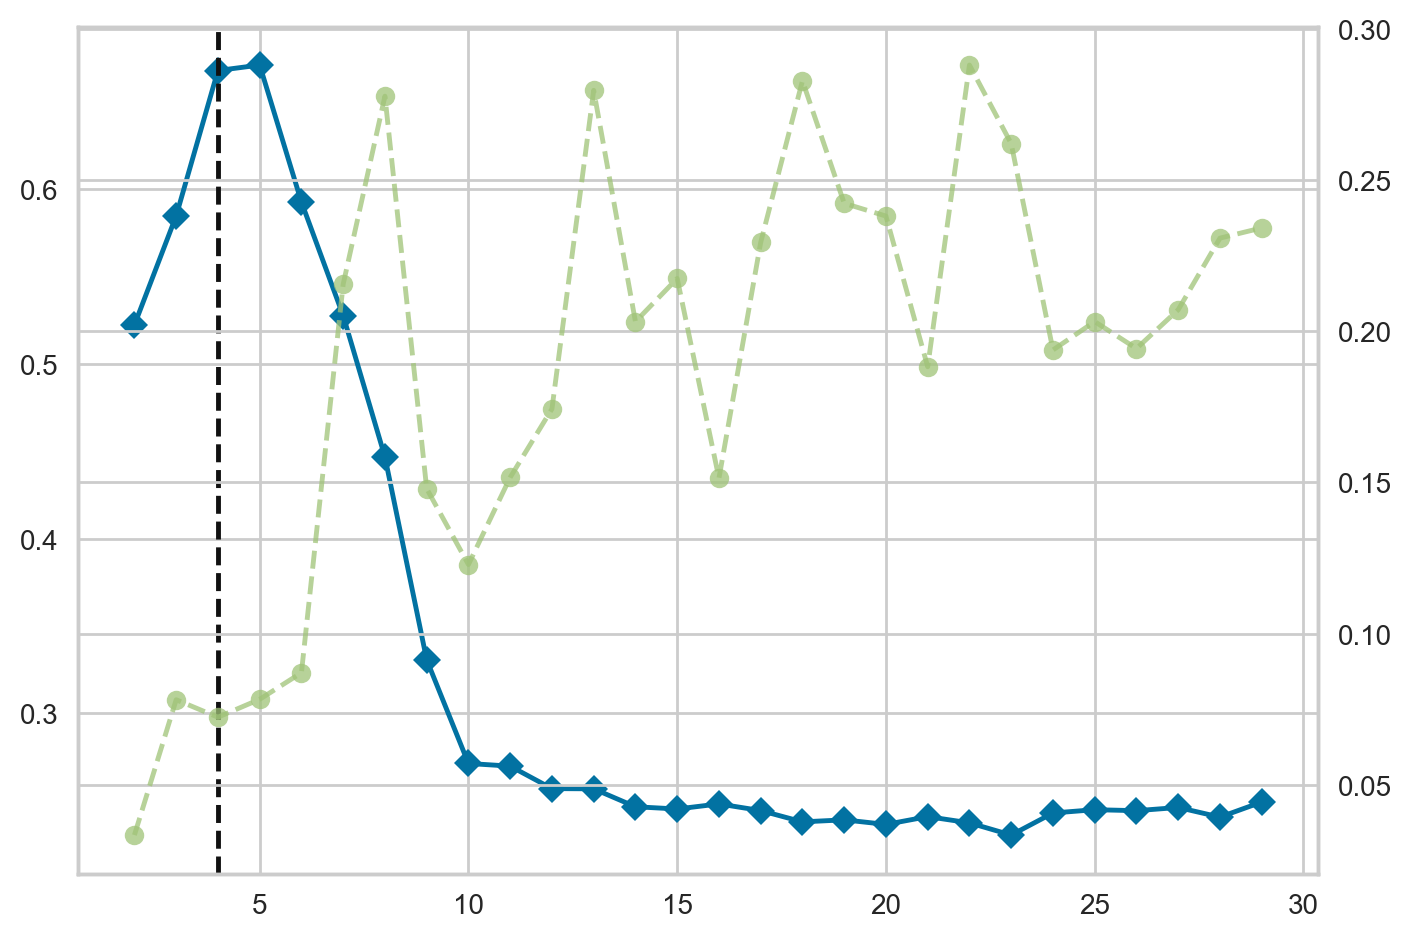

In [14]:
#procedemos a ver el otro metodo de la siluetta
visualizar_silueta = KElbowVisualizer(modelo,k = (2,30),
                                metric='silhouette'
                        )

visualizar_silueta.fit(proyecciones)
visualizar_silueta.show


En esta caso, tambien nos confirma donde se tiene mayor ganancia correponde a la al numero de cluster de 5

/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


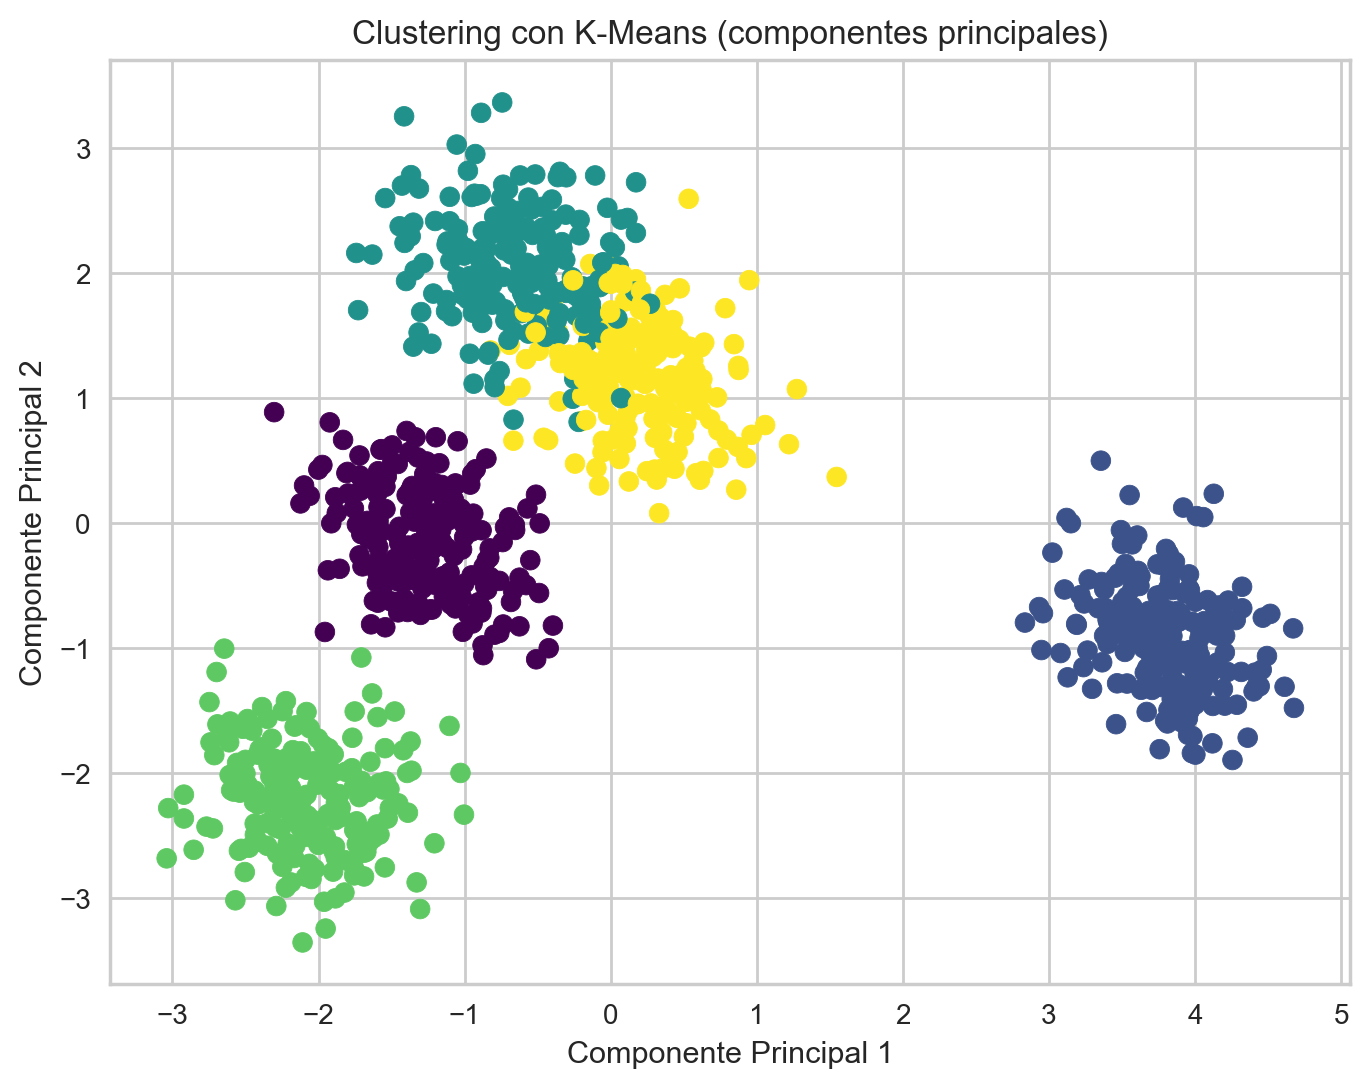

In [15]:
#procedemos a realizar el grafico con la informacion del PCA obtenido
from sklearn.cluster import KMeans

# Número óptimo de clusters (que determinamos previamente)
optimal_k = 5 # Reemplaza esto con el número óptimo que hayas obtenido.

kmeans = KMeans(n_clusters=optimal_k, random_state=2023)
kmeans.fit(proyecciones)

cluster_labels = kmeans.labels_

import matplotlib.pyplot as plt

# Supongamos que tienes los datos proyectados en X_pca, y ya obtuviste las etiquetas de los clusters en cluster_labels.

plt.figure(figsize=(8, 6))
plt.scatter(proyecciones[:, 0], proyecciones[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering con K-Means (componentes principales)')

plt.show()


/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


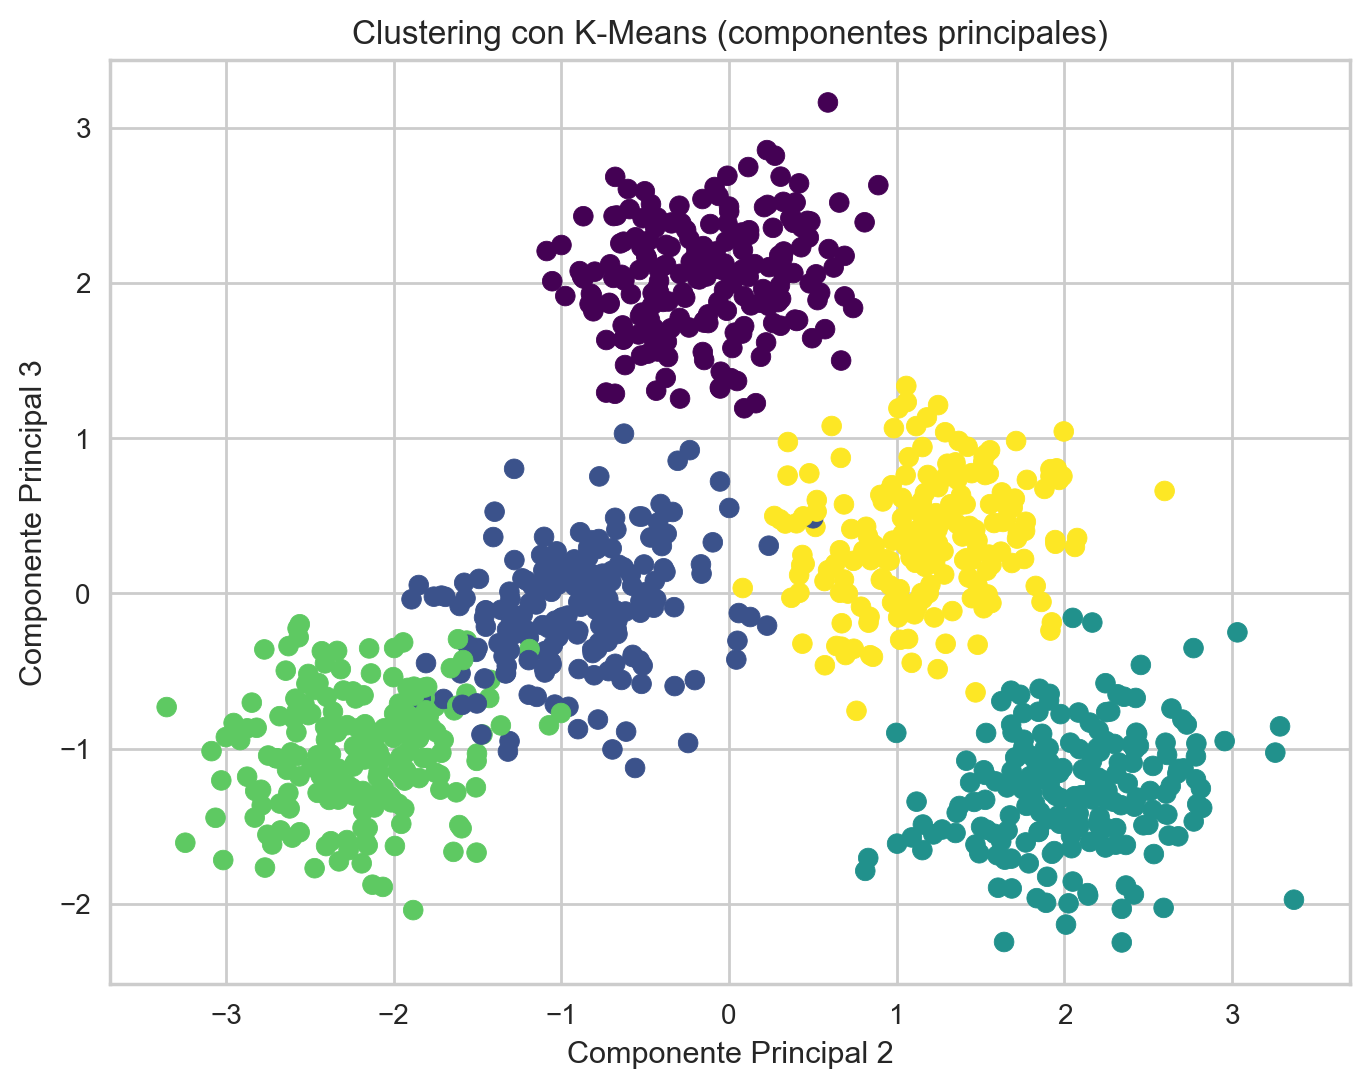

In [16]:
#procedemos a realizar el grafico con la informacion del PCA obtenido
from sklearn.cluster import KMeans

# Número óptimo de clusters (que determinamos previamente)
optimal_k = 5 # Reemplaza esto con el número óptimo que hayas obtenido.

kmeans = KMeans(n_clusters=optimal_k, random_state=2023)
kmeans.fit(proyecciones)

cluster_labels = kmeans.labels_

import matplotlib.pyplot as plt

# Supongamos que tienes los datos proyectados en X_pca, y ya obtuviste las etiquetas de los clusters en cluster_labels.

plt.figure(figsize=(8, 6))
plt.scatter(proyecciones[:, 1], proyecciones[:, 2], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Componente Principal 2')
plt.ylabel('Componente Principal 3')
plt.title('Clustering con K-Means (componentes principales)')

plt.show()

/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


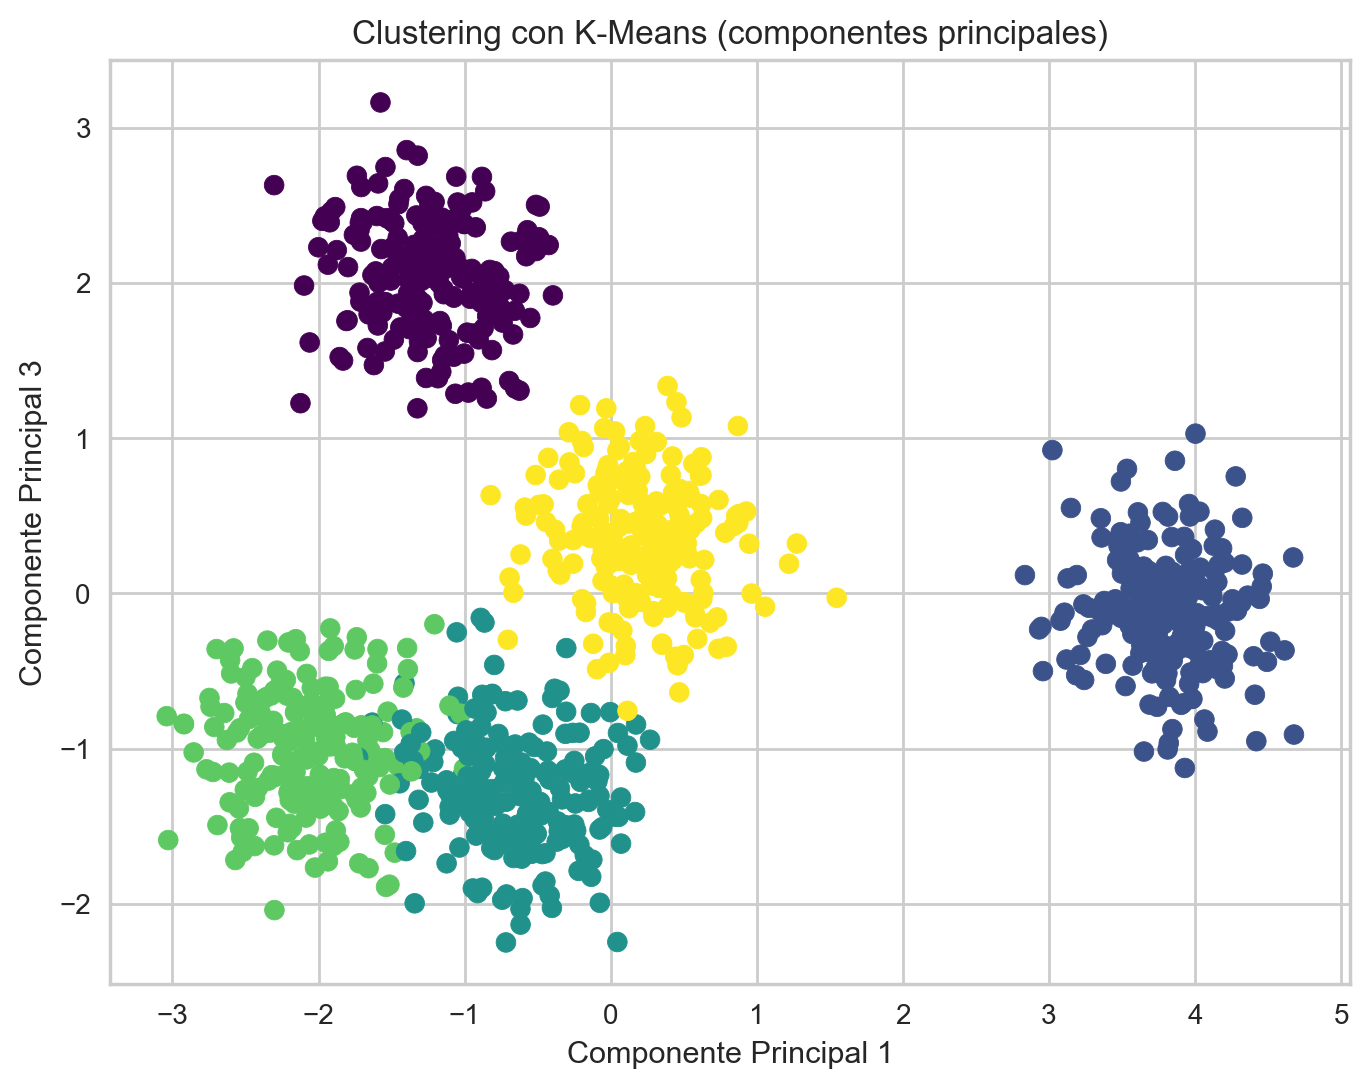

In [17]:
#procedemos a realizar el grafico con la informacion del PCA obtenido
from sklearn.cluster import KMeans

# Número óptimo de clusters (que determinamos previamente)
optimal_k = 5 # Reemplaza esto con el número óptimo que hayas obtenido.

kmeans = KMeans(n_clusters=optimal_k, random_state=2023)
kmeans.fit(proyecciones)

cluster_labels = kmeans.labels_

import matplotlib.pyplot as plt

# Supongamos que tienes los datos proyectados en X_pca, y ya obtuviste las etiquetas de los clusters en cluster_labels.

plt.figure(figsize=(8, 6))
plt.scatter(proyecciones[:, 0], proyecciones[:, 2], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 3')
plt.title('Clustering con K-Means (componentes principales)')

plt.show()

**Pregunta 3**
Ajuste un clustering de K-means, utilizando las 2 principales componentes principales gráfique los grupos ajustados, qué puede concluir al respecto?

In [18]:
#con esta informaicion podemos realizar el nuevo pipline dejando con 2 componentes principales
pipeline_pca_conponentes_2comp = make_pipeline(
                StandardScaler(),
                PCA(n_components=2, random_state=2023)
                )

pipeline_pca_conponentes_2comp.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2, random_state=2023))])

In [19]:
componentes_2= pipeline_pca_conponentes_2comp['pca'].components_

In [20]:
proyecciones_2 = pipeline_pca_conponentes_2comp.transform(x)

/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.

<bound method Visualizer.show of KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(n_clusters=14, random_state=2023), k=(2, 15))>

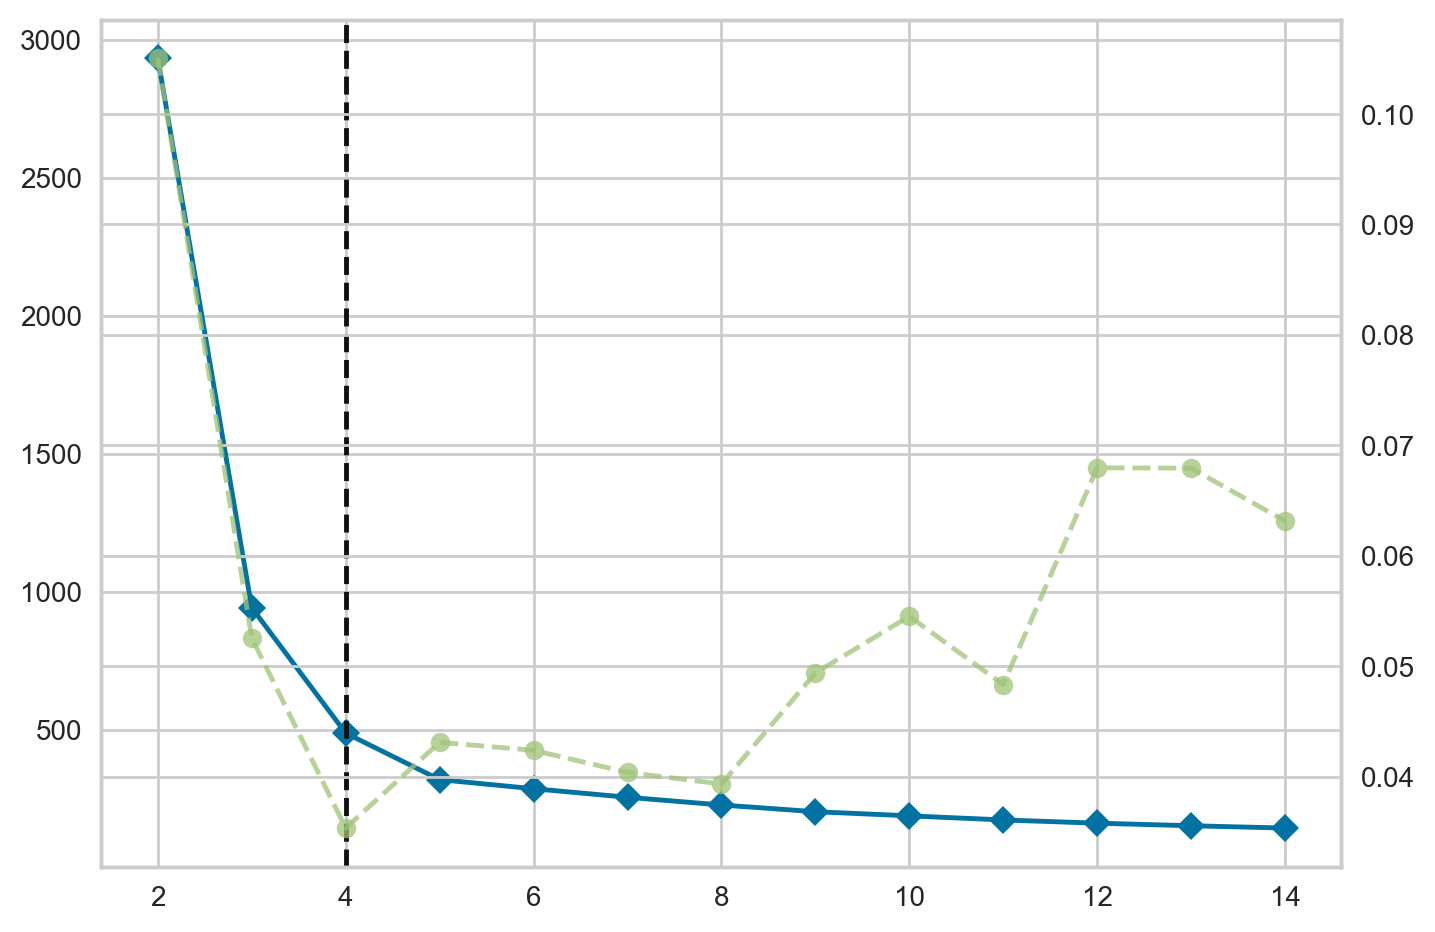

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#procedemos a realizar el mejors cluster, segun el elbow
modelo = KMeans(random_state=2023)
visualizar_elbow = KElbowVisualizer(modelo,k = (2,15),
                            )

visualizar_elbow.fit(proyecciones_2)
visualizar_elbow.show

Con este grafico podemos ver que al tener 2 PCA nos recomineda que el modlelo se ajuste a 4 clusters

/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.

<bound method Visualizer.show of KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(n_clusters=19, random_state=2023), k=(2, 20),
                 metric='silhouette')>

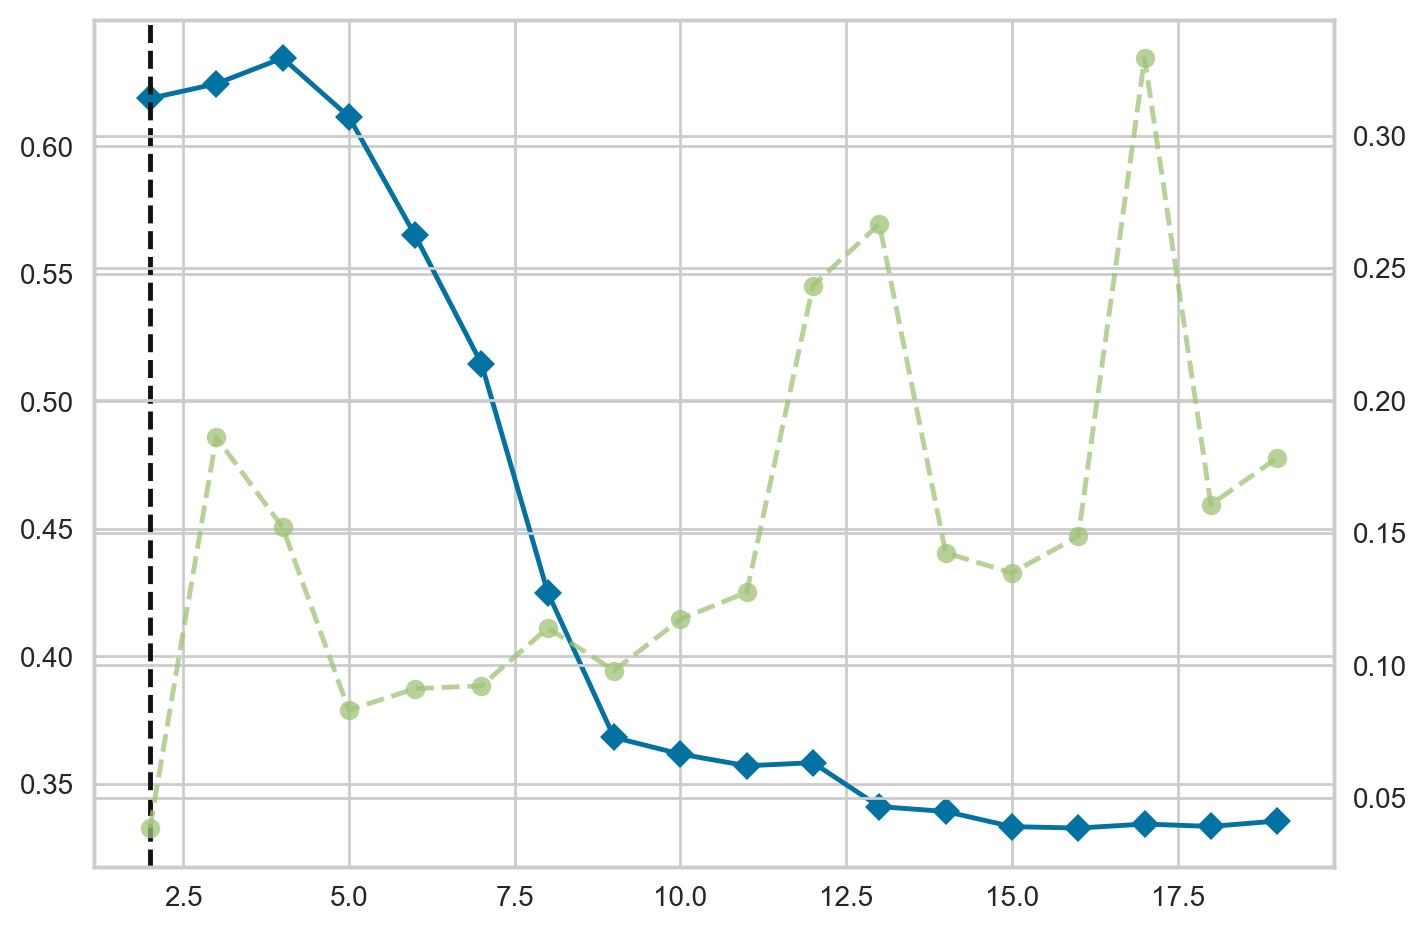

In [22]:
#procedemos a ver el otro metodo de la siluetta con el PCA de 2
visualizar_silueta = KElbowVisualizer(modelo,k = (2,20),
                                metric='silhouette'
                        )

visualizar_silueta.fit(proyecciones_2)
visualizar_silueta.show

Con el grafico de silueta para 2 componentes principlaes, indica que el numero de clusters debe ser 4

/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


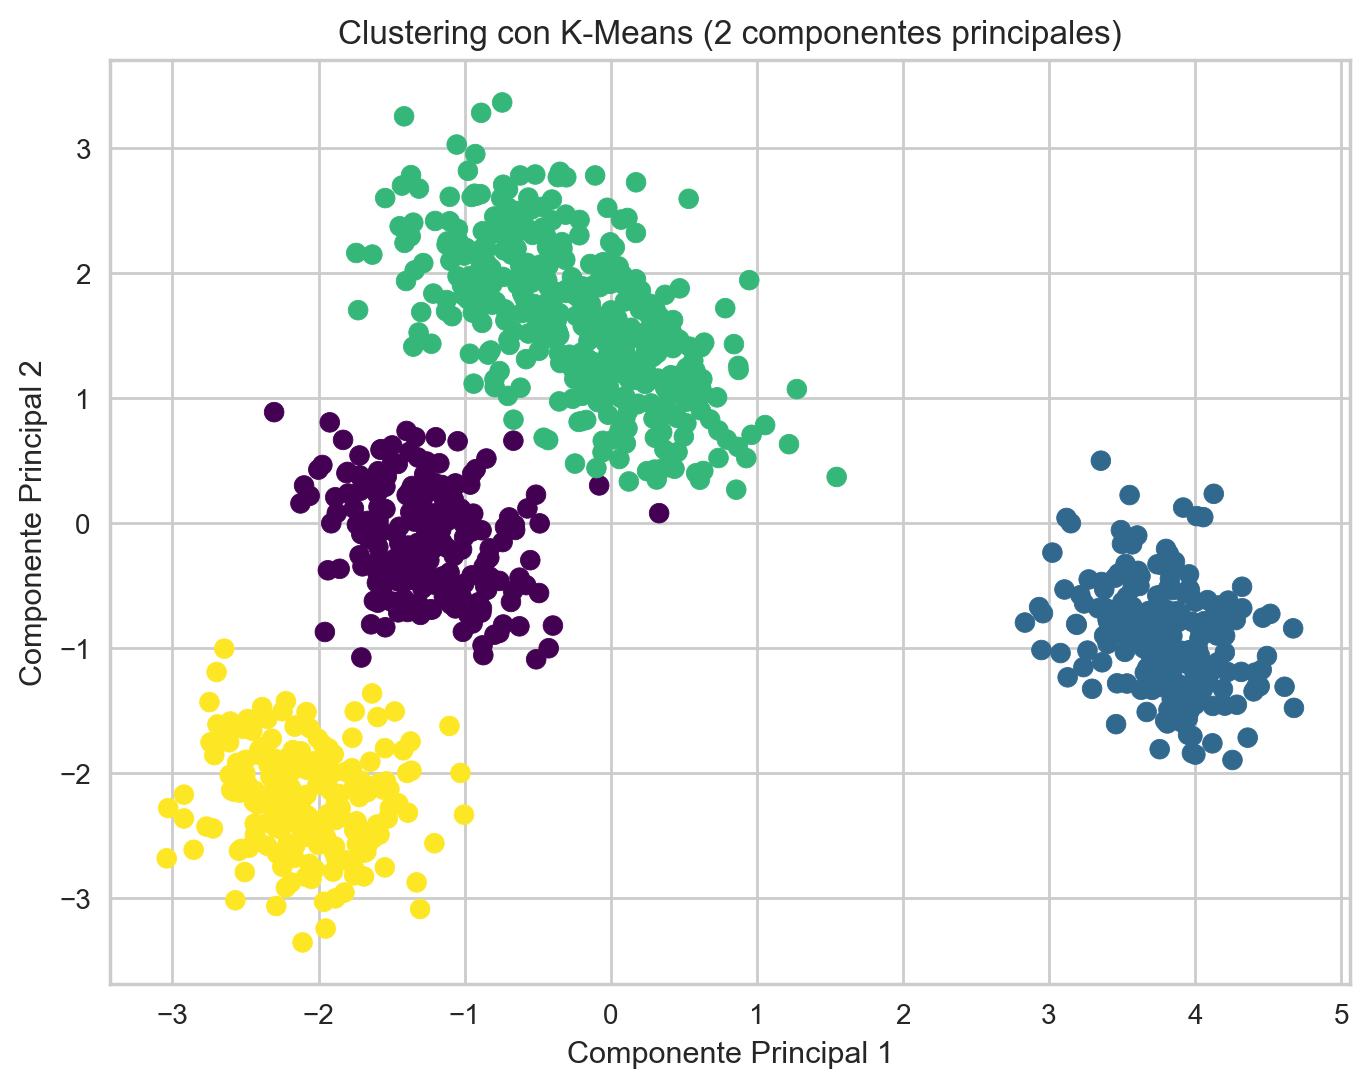

In [23]:
#procedemos a realizar el grafico con la informacion del PCA obtenido
from sklearn.cluster import KMeans

# Número óptimo de clusters (que determinamos previamente)
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=2023)
kmeans.fit(proyecciones_2)

cluster_labels = kmeans.labels_

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(proyecciones_2[:, 0], proyecciones_2[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering con K-Means (2 componentes principales)')

plt.show()

Al cambiar la cantidad de componentes principales (PCA), reducimos la cantidad de informacion que tomaba nuestro modelos, especificamente menos varianza. Al tomar menos varianza excluye ciertas caracteristicas de datos, lo que hace que el numero de cluster a utilizar cambie, en este caso de 5 a 4 clusters optimos. Tal como se pueden ver en los graficos, cuando utilizabamos 3 PCa y 5 clusters podemos observar que existe existe un grupo que se sobre poenen. Esto quiere decir que no hay tanta diferencia inter cluster (esmeralda y amarillo), lo que genera una mala segmentacion dentro de los datos. 

Al cambiar cambiar el PCA por 2, el modelo nos dice que ajustemos Kmeans a 4 clusters. Si bien tenemos menos informacion de las variables, podemos agruparlas de mejor manera, puesto que las caracteristicas de los intra cluster son mas similares. Esto hace que se sea un mejor modelo para poder agrupar.